In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
%matplotlib inline

In [2]:
torch.manual_seed(143)    # reproducible

In [3]:
# Hyper Parameters
args = {
    'epochs': 10,
    'batch_size': 64,
    'learning_rate': 0.005,
    'download_mnist': False,    # set True if have not downloaded mnist dataset
    'num_test_img': 5
}

In [4]:
# use Mnist digits datasets
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,
    transform=torchvision.transforms.ToTensor(),  # Converts a PIL.Image or numpy.ndarray to torch.FloatTensor of shape (C, H, W) and normalize to the range of [0.0, 1.0]
    download=args['download_mnist'],
)
print(train_data)
print(train_data.data.size())
print(train_data.targets.size())

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./mnist/
    Split: Train
torch.Size([60000, 28, 28])
torch.Size([60000])


(28, 28)


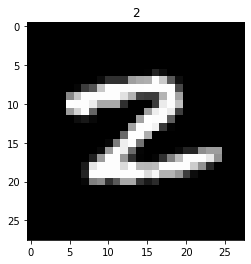

In [5]:
# plot one example
show_idx = 143
print(train_data.data[show_idx].numpy().shape)
plt.imshow(train_data.data[show_idx].numpy(), cmap='gray')
plt.title('%i' % train_data.targets[show_idx])
plt.show()

In [6]:
# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=args['batch_size'], shuffle=True)

In [7]:
class AutoEncoder(nn.Module):
    
    def __init__(self):
        super(AutoEncoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 12),
            nn.Tanh(),
            nn.Linear(12, 3),    # compress to 3 features which can be visualized in plt
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.Tanh(),
            nn.Linear(12, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),       # compress to range (0, 1)
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [8]:
AE = AutoEncoder()
print(AE)

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=12, bias=True)
    (5): Tanh()
    (6): Linear(in_features=12, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12, bias=True)
    (1): Tanh()
    (2): Linear(in_features=12, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): Tanh()
    (6): Linear(in_features=128, out_features=784, bias=True)
    (7): Sigmoid()
  )
)


In [9]:
optimizer = torch.optim.Adam(AE.parameters(), lr=args['learning_rate'])
loss_func = nn.MSELoss()

Epoch:  0  | batch:  0 | train loss: 0.2316


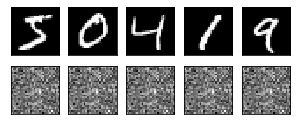

Epoch:  0  | batch:  100 | train loss: 0.0681


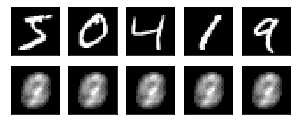

Epoch:  0  | batch:  200 | train loss: 0.0682


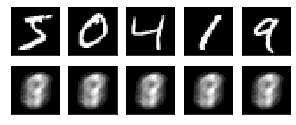

Epoch:  0  | batch:  300 | train loss: 0.0675


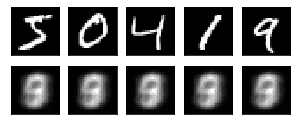

Epoch:  0  | batch:  400 | train loss: 0.0624


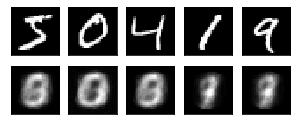

Epoch:  0  | batch:  500 | train loss: 0.0616


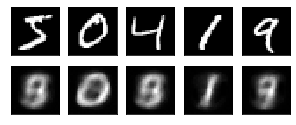

Epoch:  0  | batch:  600 | train loss: 0.0569


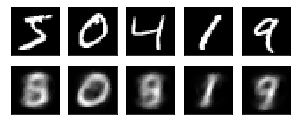

Epoch:  0  | batch:  700 | train loss: 0.0572


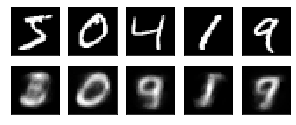

Epoch:  0  | batch:  800 | train loss: 0.0523


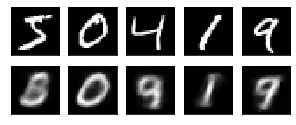

Epoch:  0  | batch:  900 | train loss: 0.0505


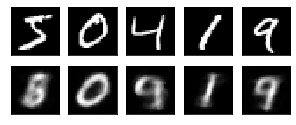

Epoch:  1  | batch:  0 | train loss: 0.0476


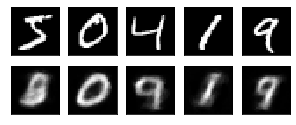

Epoch:  1  | batch:  100 | train loss: 0.0443


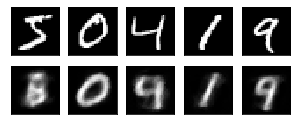

Epoch:  1  | batch:  200 | train loss: 0.0450


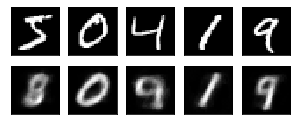

Epoch:  1  | batch:  300 | train loss: 0.0473


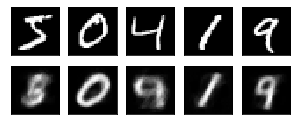

Epoch:  1  | batch:  400 | train loss: 0.0465


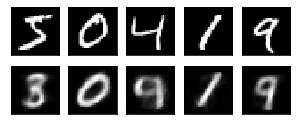

Epoch:  1  | batch:  500 | train loss: 0.0476


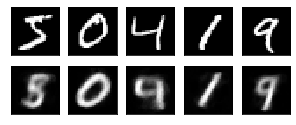

Epoch:  1  | batch:  600 | train loss: 0.0474


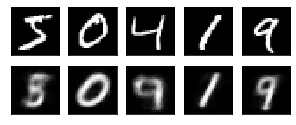

Epoch:  1  | batch:  700 | train loss: 0.0410


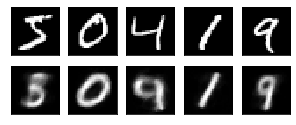

Epoch:  1  | batch:  800 | train loss: 0.0385


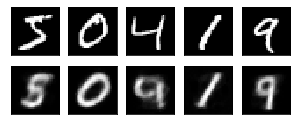

Epoch:  1  | batch:  900 | train loss: 0.0444


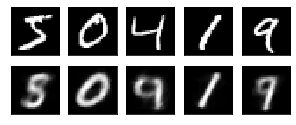

Epoch:  2  | batch:  0 | train loss: 0.0437


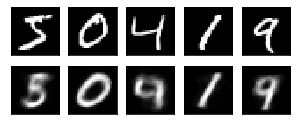

Epoch:  2  | batch:  100 | train loss: 0.0471


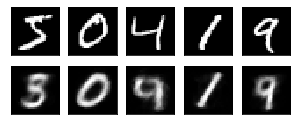

Epoch:  2  | batch:  200 | train loss: 0.0396


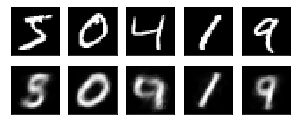

Epoch:  2  | batch:  300 | train loss: 0.0450


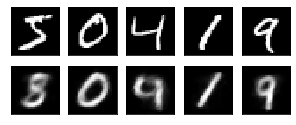

Epoch:  2  | batch:  400 | train loss: 0.0429


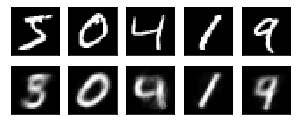

Epoch:  2  | batch:  500 | train loss: 0.0428


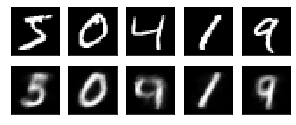

Epoch:  2  | batch:  600 | train loss: 0.0436


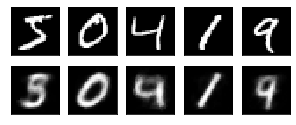

Epoch:  2  | batch:  700 | train loss: 0.0412


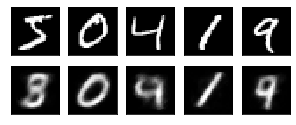

Epoch:  2  | batch:  800 | train loss: 0.0394


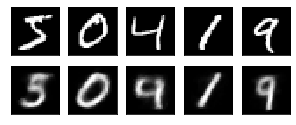

Epoch:  2  | batch:  900 | train loss: 0.0420


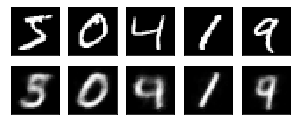

Epoch:  3  | batch:  0 | train loss: 0.0402


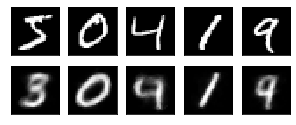

Epoch:  3  | batch:  100 | train loss: 0.0337


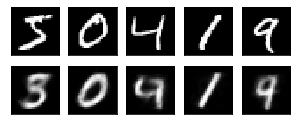

Epoch:  3  | batch:  200 | train loss: 0.0378


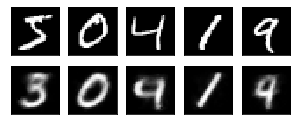

Epoch:  3  | batch:  300 | train loss: 0.0385


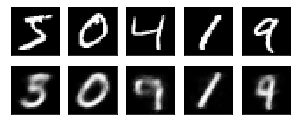

Epoch:  3  | batch:  400 | train loss: 0.0431


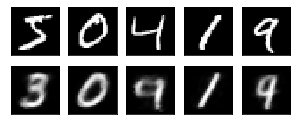

Epoch:  3  | batch:  500 | train loss: 0.0362


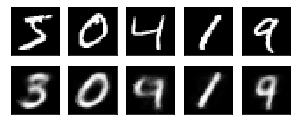

Epoch:  3  | batch:  600 | train loss: 0.0362


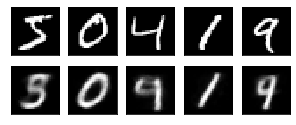

Epoch:  3  | batch:  700 | train loss: 0.0399


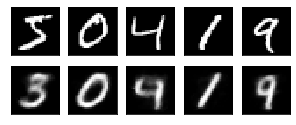

Epoch:  3  | batch:  800 | train loss: 0.0390


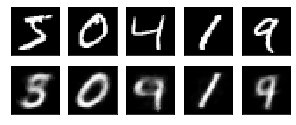

Epoch:  3  | batch:  900 | train loss: 0.0371


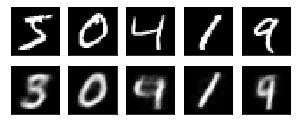

Epoch:  4  | batch:  0 | train loss: 0.0340


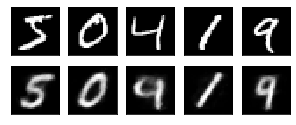

Epoch:  4  | batch:  100 | train loss: 0.0380


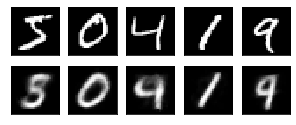

Epoch:  4  | batch:  200 | train loss: 0.0353


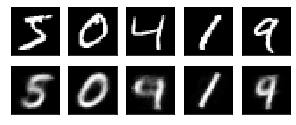

Epoch:  4  | batch:  300 | train loss: 0.0395


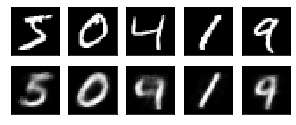

Epoch:  4  | batch:  400 | train loss: 0.0357


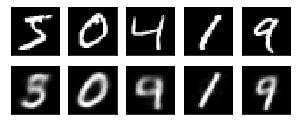

Epoch:  4  | batch:  500 | train loss: 0.0383


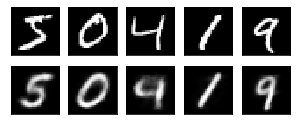

Epoch:  4  | batch:  600 | train loss: 0.0405


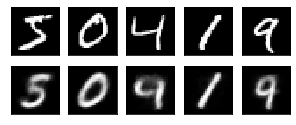

Epoch:  4  | batch:  700 | train loss: 0.0348


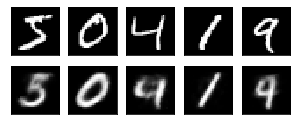

Epoch:  4  | batch:  800 | train loss: 0.0387


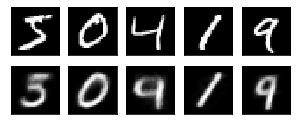

Epoch:  4  | batch:  900 | train loss: 0.0350


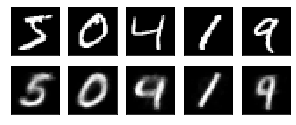

Epoch:  5  | batch:  0 | train loss: 0.0355


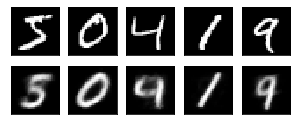

Epoch:  5  | batch:  100 | train loss: 0.0355


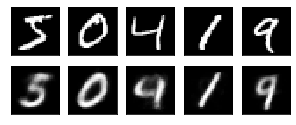

Epoch:  5  | batch:  200 | train loss: 0.0355


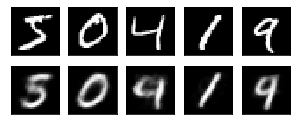

Epoch:  5  | batch:  300 | train loss: 0.0398


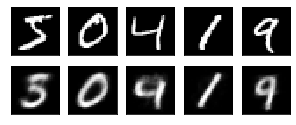

Epoch:  5  | batch:  400 | train loss: 0.0386


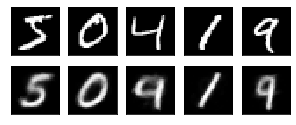

Epoch:  5  | batch:  500 | train loss: 0.0352


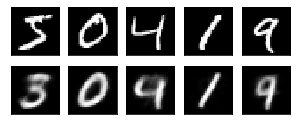

Epoch:  5  | batch:  600 | train loss: 0.0351


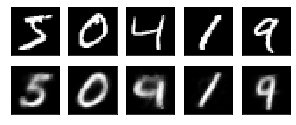

Epoch:  5  | batch:  700 | train loss: 0.0383


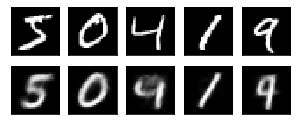

Epoch:  5  | batch:  800 | train loss: 0.0351


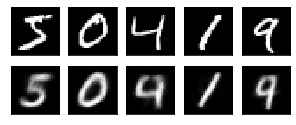

Epoch:  5  | batch:  900 | train loss: 0.0356


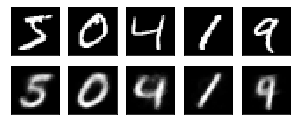

Epoch:  6  | batch:  0 | train loss: 0.0324


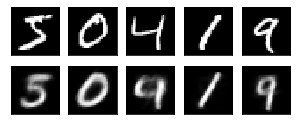

Epoch:  6  | batch:  100 | train loss: 0.0380


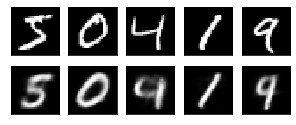

Epoch:  6  | batch:  200 | train loss: 0.0340


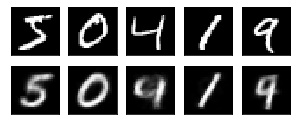

Epoch:  6  | batch:  300 | train loss: 0.0383


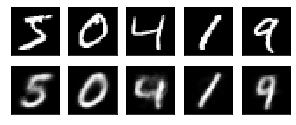

Epoch:  6  | batch:  400 | train loss: 0.0365


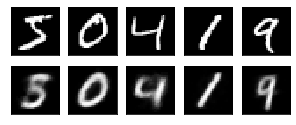

Epoch:  6  | batch:  500 | train loss: 0.0359


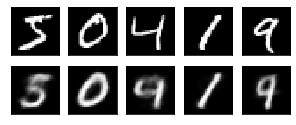

Epoch:  6  | batch:  600 | train loss: 0.0378


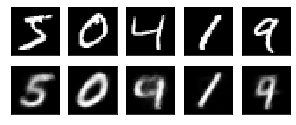

Epoch:  6  | batch:  700 | train loss: 0.0366


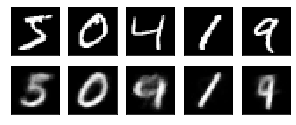

Epoch:  6  | batch:  800 | train loss: 0.0317


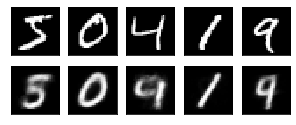

Epoch:  6  | batch:  900 | train loss: 0.0370


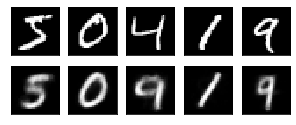

Epoch:  7  | batch:  0 | train loss: 0.0379


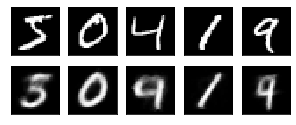

Epoch:  7  | batch:  100 | train loss: 0.0358


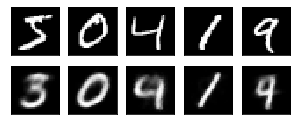

Epoch:  7  | batch:  200 | train loss: 0.0368


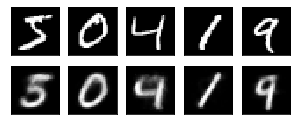

Epoch:  7  | batch:  300 | train loss: 0.0423


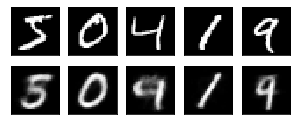

Epoch:  7  | batch:  400 | train loss: 0.0379


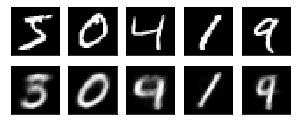

Epoch:  7  | batch:  500 | train loss: 0.0358


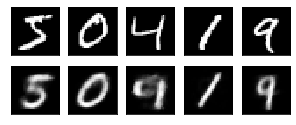

Epoch:  7  | batch:  600 | train loss: 0.0360


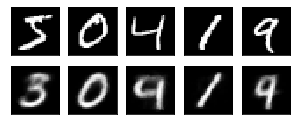

Epoch:  7  | batch:  700 | train loss: 0.0374


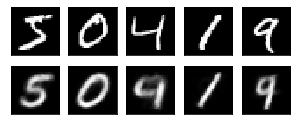

Epoch:  7  | batch:  800 | train loss: 0.0348


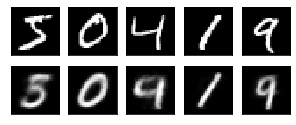

Epoch:  7  | batch:  900 | train loss: 0.0330


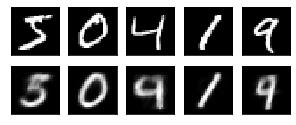

Epoch:  8  | batch:  0 | train loss: 0.0362


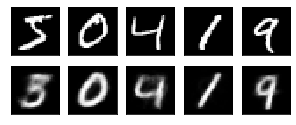

Epoch:  8  | batch:  100 | train loss: 0.0360


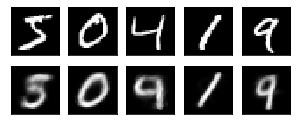

Epoch:  8  | batch:  200 | train loss: 0.0341


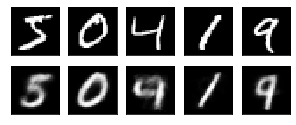

Epoch:  8  | batch:  300 | train loss: 0.0382


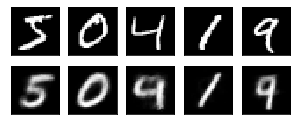

Epoch:  8  | batch:  400 | train loss: 0.0369


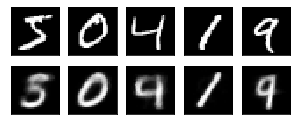

Epoch:  8  | batch:  500 | train loss: 0.0345


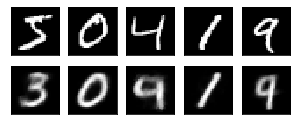

Epoch:  8  | batch:  600 | train loss: 0.0359


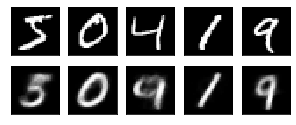

Epoch:  8  | batch:  700 | train loss: 0.0394


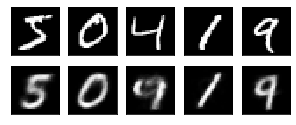

Epoch:  8  | batch:  800 | train loss: 0.0343


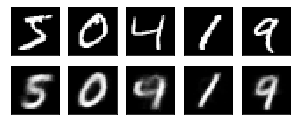

Epoch:  8  | batch:  900 | train loss: 0.0332


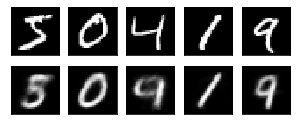

Epoch:  9  | batch:  0 | train loss: 0.0355


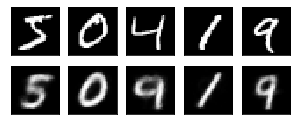

Epoch:  9  | batch:  100 | train loss: 0.0372


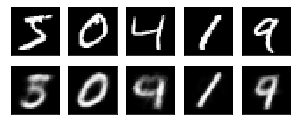

Epoch:  9  | batch:  200 | train loss: 0.0351


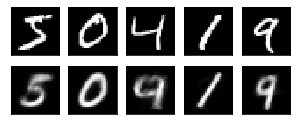

Epoch:  9  | batch:  300 | train loss: 0.0319


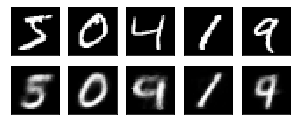

Epoch:  9  | batch:  400 | train loss: 0.0370


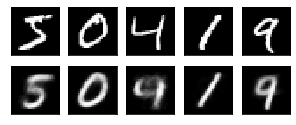

Epoch:  9  | batch:  500 | train loss: 0.0356


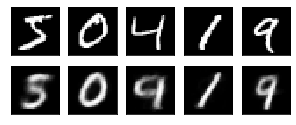

Epoch:  9  | batch:  600 | train loss: 0.0317


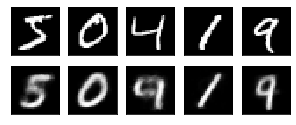

Epoch:  9  | batch:  700 | train loss: 0.0333


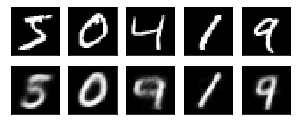

Epoch:  9  | batch:  800 | train loss: 0.0280


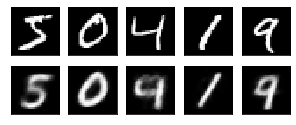

Epoch:  9  | batch:  900 | train loss: 0.0374


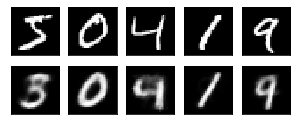

In [10]:
# train
    
for epoch in range(args['epochs']):
    for step, (x, b_label) in enumerate(train_loader):
        b_x = x.view(-1, 28*28)
        b_y = x.view(-1, 28*28)
        
        encoded, decoded = AE(b_x)
        
        loss = loss_func(decoded, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step % 100 == 0:
            print('Epoch: ', epoch, ' | batch: ', step, '| train loss: %.4f' % loss.data.numpy())

            # initialize a figure
            f, a = plt.subplots(2, args['num_test_img'], figsize=(5, 2))
            plt.ion()   # continuously plot

            # original data (in the 1st row) for viewing
            view_data = train_data.data[:args['num_test_img']].view(-1, 28*28).type(torch.FloatTensor) / 255.
            
            for i in range(args['num_test_img']):
                a[0][i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)), cmap='gray')
                a[0][i].set_xticks(())
                a[0][i].set_yticks(())
                
            # plot decoded image (in the 2nd row)
            _, decoded_digit = AE(view_data)
            
            for i in range(args['num_test_img']):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_digit.data.numpy()[i], (28, 28)), cmap='gray')
                a[1][i].set_xticks(())
                a[1][i].set_yticks(())
                
            plt.show()
            plt.pause(0.05)
            
# plt.ioff()
# plt.show()

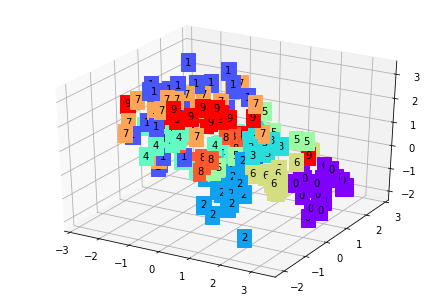

In [11]:
# visualize in 3D plot
view_data = train_data.data[:200].view(-1, 28*28).type(torch.FloatTensor)/255.
encoded_data, _ = AE(view_data)
fig = plt.figure(2); ax = Axes3D(fig)
X, Y, Z = encoded_data.data[:, 0].numpy(), encoded_data.data[:, 1].numpy(), encoded_data.data[:, 2].numpy()
values = train_data.targets[:200].numpy()
for x, y, z, s in zip(X, Y, Z, values):
    c = cm.rainbow(int(255*s/9)); ax.text(x, y, z, s, backgroundcolor=c)
ax.set_xlim(X.min(), X.max()); ax.set_ylim(Y.min(), Y.max()); ax.set_zlim(Z.min(), Z.max())
plt.show()